In [1]:
from pyspark.sql import SparkSession
#create a SparkSession
spark = (SparkSession
    .builder
    .appName("Un poquito de Spark")
    .getOrCreate())

## La siguiente sección de la práctica se abordará si ya se tienen suficientes conocimientos de Spark, en concreto de el manejo de DataFrames, y el manejo de tablas de Hive a través de Spark.sql.

#### • 6.1) Comenzamos realizando la misma práctica que hicimos en Hive en Spark, importando el csv. Sería recomendable intentarlo con opciones que quiten las "" de los campos, que ignoren los espacios innecesarios en los campos, que sustituyan los valores vacíos por 0 y que infiera el esquema.

#### •6.2) De manera alternativa también se puede importar el csv con menos tratamiento en la importación y hacer todas las modificaciones para alcanzar el mismo estado de limpieza de los datos con funciones de Spark.

In [2]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

df = (spark.read.csv("Rango_Edades_Seccion_202110.csv",
                    inferSchema = True,
                    header = True, 
                    sep = ';'
                    ) 
     )
df.cache()

DataFrame[COD_DISTRITO: int, DESC_DISTRITO: string, COD_DIST_BARRIO: int, DESC_BARRIO: string, COD_BARRIO: int, COD_DIST_SECCION: int, COD_SECCION: int, COD_EDAD_INT: int, EspanolesHombres: int, EspanolesMujeres: int, ExtranjerosHombres: int, ExtranjerosMujeres: int]

In [3]:
df = (df
     .withColumn("DESC_BARRIO",regexp_replace("DESC_BARRIO","�","n") )
     .withColumn("DESC_BARRIO",regexp_replace("DESC_BARRIO","\.","") )
     )

In [4]:
df = (df
       .withColumn("DESC_DISTRITO",trim("DESC_DISTRITO")) 
       .withColumn("DESC_BARRIO",trim("DESC_BARRIO")) 
       .withColumn("EspanolesHombres",when(col("EspanolesHombres").isNull(), 0 )
                   .otherwise(col("EspanolesHombres")                             )
                  )
       .withColumn("EspanolesMujeres",when(col("EspanolesMujeres").isNull(), 0)
                   .otherwise(col("EspanolesMujeres")                             )
                  )
       .withColumn("ExtranjerosHombres",when(col("ExtranjerosHombres").isNull(), 0)
                   .otherwise(col("ExtranjerosHombres")                             )
                  )
       .withColumn("ExtranjerosMujeres",when(col("ExtranjerosMujeres").isNull(), 0)
                   .otherwise(col("ExtranjerosMujeres")                             )
                  )
     )

In [5]:
df.toPandas()

,COD_DISTRITO,DESC_DISTRITO,COD_DIST_BARRIO,DESC_BARRIO,COD_BARRIO,COD_DIST_SECCION,COD_SECCION,COD_EDAD_INT,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres
0,1,CENTRO,101,PALACIO,1,1006,6,97,1,1,0,0
1,1,CENTRO,101,PALACIO,1,1006,6,98,0,1,0,0
2,1,CENTRO,101,PALACIO,1,1006,6,99,1,1,0,0
3,1,CENTRO,101,PALACIO,1,1006,6,101,0,1,0,0
4,1,CENTRO,101,PALACIO,1,1006,6,104,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238143,21,BARAJAS,2105,CORRALEJOS,5,21032,32,95,1,3,0,0
238144,21,BARAJAS,2105,CORRALEJOS,5,21032,32,96,1,0,0,0
238145,21,BARAJAS,2105,CORRALEJOS,5,21032,32,97,1,2,0,0
238146,21,BARAJAS,2105,CORRALEJOS,5,21032,32,98,0,2,0,0


#### • 6.3) Enumera todos los barrios diferentes.

In [6]:
df.select("DESC_BARRIO").distinct().show()

+--------------------+
|         DESC_BARRIO|
+--------------------+
|        VALDEFUENTES|
|       LOS JERONIMOS|
|            ABRANTES|
|     CASCO HVALLECAS|
|            VALVERDE|
|              CORTES|
|   PALOMERAS SURESTE|
|CIUDAD UNIVERSITARIA|
|      CUATRO VIENTOS|
|           TRAFALGAR|
|              HELLIN|
|    ALAMEDA DE OSUNA|
|          PRADOLONGO|
|            MOSCARDO|
|    CASCO HVICALVARO|
|          VALDEZARZA|
|           RECOLETOS|
|             HORCAJO|
|        VISTA ALEGRE|
|             EL VISO|
+--------------------+
only showing top 20 rows



#### • 6.4) Crea una vista temporal de nombre "padron" y a través de ella cuenta el número de barrios
diferentes que hay.

In [7]:
df.createOrReplaceTempView("Padron");

In [8]:
spark.sql("""SELECT COUNT(DISTINCT DESC_BARRIO) FROM Padron""").show()

+---------------------------+
|count(DISTINCT DESC_BARRIO)|
+---------------------------+
|                        132|
+---------------------------+



#### 6.5) Crea una nueva columna que muestre la longitud de los campos de la columna DESC_DISTRITO y que se llame "longitud".

In [9]:
df1 = (df  
       .withColumn("longitud", length(col("DESC_DISTRITO")))
     )

In [10]:
df1.toPandas()

,COD_DISTRITO,DESC_DISTRITO,COD_DIST_BARRIO,DESC_BARRIO,COD_BARRIO,COD_DIST_SECCION,COD_SECCION,COD_EDAD_INT,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres,longitud
0,1,CENTRO,101,PALACIO,1,1006,6,97,1,1,0,0,6
1,1,CENTRO,101,PALACIO,1,1006,6,98,0,1,0,0,6
2,1,CENTRO,101,PALACIO,1,1006,6,99,1,1,0,0,6
3,1,CENTRO,101,PALACIO,1,1006,6,101,0,1,0,0,6
4,1,CENTRO,101,PALACIO,1,1006,6,104,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238143,21,BARAJAS,2105,CORRALEJOS,5,21032,32,95,1,3,0,0,7
238144,21,BARAJAS,2105,CORRALEJOS,5,21032,32,96,1,0,0,0,7
238145,21,BARAJAS,2105,CORRALEJOS,5,21032,32,97,1,2,0,0,7
238146,21,BARAJAS,2105,CORRALEJOS,5,21032,32,98,0,2,0,0,7


#### • 6.6) Crea una nueva columna que muestre el valor 5 para cada uno de los registros de la tabla.

In [11]:
df2 = (df  
       .withColumn("cinco", lit(5))
     )

In [12]:
df2.toPandas().head(1)

,COD_DISTRITO,DESC_DISTRITO,COD_DIST_BARRIO,DESC_BARRIO,COD_BARRIO,COD_DIST_SECCION,COD_SECCION,COD_EDAD_INT,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres,cinco
0,1,CENTRO,101,PALACIO,1,1006,6,97,1,1,0,0,5


#### • 6.7) Borra esta columna.

In [13]:
df2 = df2.drop("cinco")

In [14]:
df2.toPandas().head(1)

,COD_DISTRITO,DESC_DISTRITO,COD_DIST_BARRIO,DESC_BARRIO,COD_BARRIO,COD_DIST_SECCION,COD_SECCION,COD_EDAD_INT,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres
0,1,CENTRO,101,PALACIO,1,1006,6,97,1,1,0,0


#### • 6.8) Particiona el DataFrame por las variables DESC_DISTRITO y DESC_BARRIO.

In [15]:
df_particionado = df.repartition("DESC_DISTRITO","DESC_BARRIO")
df_particionado.cache()
df_particionado.show(2)

+------------+-------------------+---------------+-----------+----------+----------------+-----------+------------+----------------+----------------+------------------+------------------+
|COD_DISTRITO|      DESC_DISTRITO|COD_DIST_BARRIO|DESC_BARRIO|COD_BARRIO|COD_DIST_SECCION|COD_SECCION|COD_EDAD_INT|EspanolesHombres|EspanolesMujeres|ExtranjerosHombres|ExtranjerosMujeres|
+------------+-------------------+---------------+-----------+----------+----------------+-----------+------------+----------------+----------------+------------------+------------------+
|           8|FUENCARRAL-EL PARDO|            807| MIRASIERRA|         7|            8181|        181|          12|              15|              19|                 0|                 0|
|           8|FUENCARRAL-EL PARDO|            807| MIRASIERRA|         7|            8181|        181|          13|              19|              13|                 0|                 1|
+------------+-------------------+---------------+----------

#### • 6.9) Almacénalo en caché. Consulta en el puerto 4040 (UI de Spark) de tu usuario local el estado de los rdds almacenados.

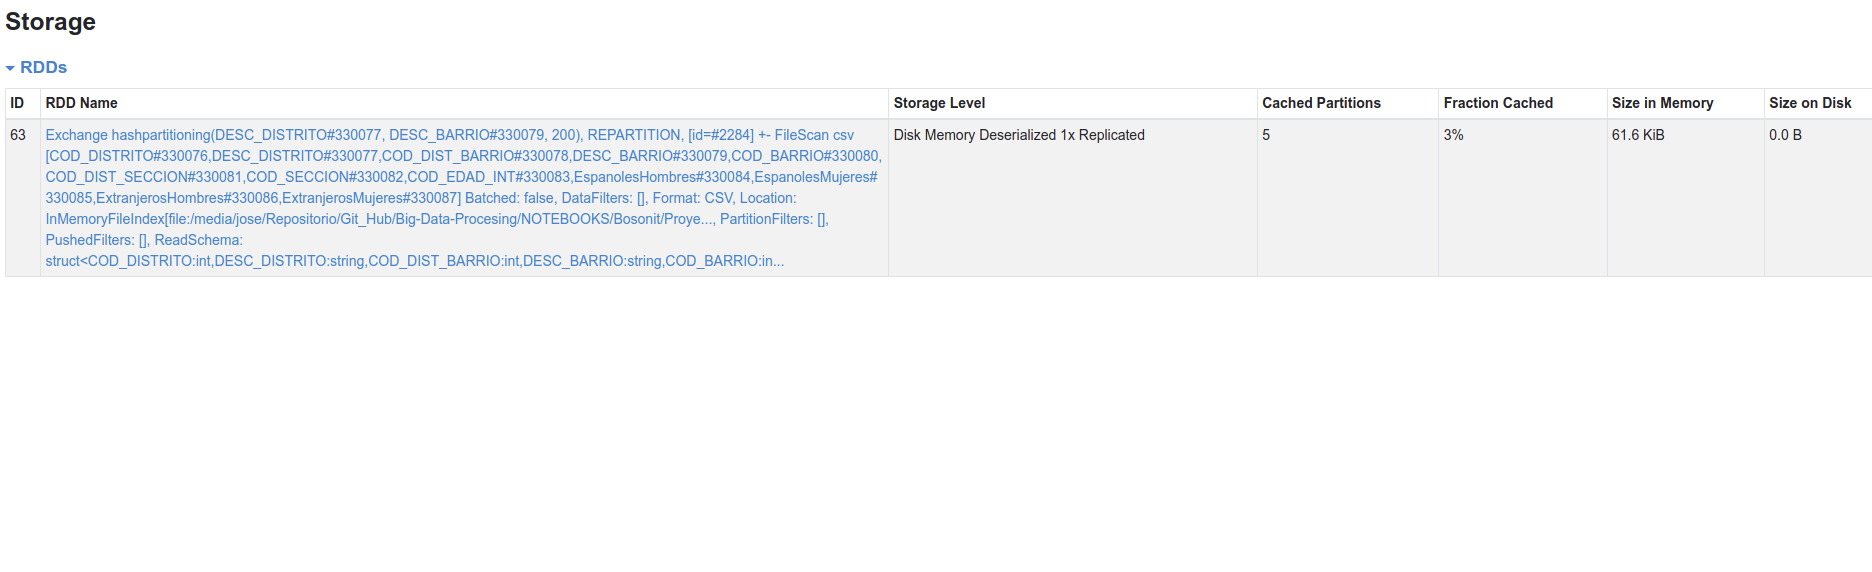

#### • 6.10) Lanza una consulta contra el DF resultante en la que muestre el número total de "espanoleshombres", "espanolesmujeres", extranjeroshombres" y "extranjerosmujeres" para cada barrio de cada distrito. Las columnas distrito y barrio deben ser las primeras en aparecer en el show. Los resultados deben estar ordenados en orden de más a menos según la columna "extranjerosmujeres" y desempatarán por la columna "extranjeroshombres".

In [16]:
(df_particionado
 .groupBy ("DESC_DISTRITO","DESC_BARRIO")
 .agg(sum("EspanolesHombres").alias("EspanolesHombres"),
      sum("EspanolesMujeres").alias("EspanolesMujeres"),
      sum("ExtranjerosHombres").alias("ExtranjerosHombres"),
      sum("ExtranjerosMujeres").alias("ExtranjerosMujeres"))
 .orderBy(col("ExtranjerosMujeres").desc(),col("ExtranjerosHombres").desc())
 ).toPandas()

,DESC_DISTRITO,DESC_BARRIO,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres
0,PUENTE DE VALLECAS,SAN DIEGO,13827,15477,6770,6912
1,LATINA,ALUCHE,24943,29741,5361,6225
2,CIUDAD LINEAL,PUEBLO NUEVO,23333,27313,5493,6182
3,CARABANCHEL,VISTA ALEGRE,15966,19436,5356,6068
4,CENTRO,EMBAJADORES,16660,16574,8121,5846
...,...,...,...,...,...,...
127,FUENCARRAL-EL PARDO,FUENTELARREINA,1445,1669,72,165
128,CIUDAD LINEAL,ATALAYA,609,812,76,100
129,FUENCARRAL-EL PARDO,EL PARDO,1646,1629,74,93
130,ARGANZUELA,ATOCHA,734,744,53,63


#### • 6.11) Elimina el registro en caché.

In [17]:
df_particionado.unpersist()

DataFrame[COD_DISTRITO: int, DESC_DISTRITO: string, COD_DIST_BARRIO: int, DESC_BARRIO: string, COD_BARRIO: int, COD_DIST_SECCION: int, COD_SECCION: int, COD_EDAD_INT: int, EspanolesHombres: int, EspanolesMujeres: int, ExtranjerosHombres: int, ExtranjerosMujeres: int]

#### • 6.12) Crea un nuevo DataFrame a partir del original que muestre únicamente una columna con DESC_BARRIO, otra con DESC_DISTRITO y otra con el número total de "espanoleshombres" residentes en cada distrito de cada barrio. Únelo (con un join) con el DataFrame original a través de las columnas en común.

In [18]:
df2 = (df
       .groupBy("DESC_DISTRITO","DESC_BARRIO")
       .sum("EspanolesHombres")
       .select("DESC_DISTRITO",
               "DESC_BARRIO",
               col("sum(EspanolesHombres)").alias("Total")
        )  
      )

In [19]:
df2.show(132)

+-------------------+--------------------+-----+
|      DESC_DISTRITO|         DESC_BARRIO|Total|
+-------------------+--------------------+-----+
|FUENCARRAL-EL PARDO|          MIRASIERRA|16169|
|          SALAMANCA|          CASTELLANA| 6137|
|SAN BLAS-CANILLEJAS|         EL SALVADOR| 4866|
|          HORTALEZA|        VALDEFUENTES|28684|
|    MONCLOA-ARAVACA|       CASA DE CAMPO| 5415|
|          MORATALAZ|          MARROQUINA|11388|
|             TETUAN|       BELLAS VISTAS|10217|
|             CENTRO|            JUSTICIA| 7079|
|             CENTRO|         UNIVERSIDAD|12478|
|      CIUDAD LINEAL|             ATALAYA|  609|
|             TETUAN|          BERRUGUETE| 8646|
|          CHAMARTIN|            CASTILLA| 7138|
|         ARGANZUELA|             LEGAZPI| 8909|
|SAN BLAS-CANILLEJAS|              HELLIN| 3592|
|             RETIRO|          NInO JESUS| 6589|
|          CHAMARTIN|      HISPANOAMERICA|13224|
|  VILLA DE VALLECAS|       SANTA EUGENIA|10356|
|        CARABANCHEL

In [20]:
df3 = df.join(df2,["DESC_DISTRITO","DESC_BARRIO"])
df3.toPandas()

,DESC_DISTRITO,DESC_BARRIO,COD_DISTRITO,COD_DIST_BARRIO,COD_BARRIO,COD_DIST_SECCION,COD_SECCION,COD_EDAD_INT,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres,Total
0,FUENCARRAL-EL PARDO,MIRASIERRA,8,807,7,8181,181,12,15,19,0,0,16169
1,FUENCARRAL-EL PARDO,MIRASIERRA,8,807,7,8181,181,13,19,13,0,1,16169
2,FUENCARRAL-EL PARDO,MIRASIERRA,8,807,7,8181,181,14,19,17,0,1,16169
3,FUENCARRAL-EL PARDO,MIRASIERRA,8,807,7,8181,181,15,9,15,0,0,16169
4,FUENCARRAL-EL PARDO,MIRASIERRA,8,807,7,8181,181,16,16,12,0,0,16169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238143,VILLAVERDE,BUTARQUE,17,1703,3,17115,115,84,1,1,0,0,8705
238144,VILLAVERDE,BUTARQUE,17,1703,3,17115,115,87,1,0,0,0,8705
238145,VILLAVERDE,BUTARQUE,17,1703,3,17115,115,88,1,0,0,0,8705
238146,VILLAVERDE,BUTARQUE,17,1703,3,17115,115,94,0,0,1,0,8705


#### • 6.13) Repite la función anterior utilizando funciones de ventana. (over(Window.partitionBy.....)).

In [21]:
#from pyspark.sql import Window
#column_list = ["DESC_DISTRITO","DESC_BARRIO"]

#### • 6.14) Mediante una función Pivot muestra una tabla (que va a ser una tabla de contingencia) que contenga los valores totales ()la suma de valores) de espanolesmujeres para cada distrito y en cada rango de edad (COD_EDAD_INT). Los distritos incluidos deben ser únicamente CENTRO, BARAJAS y RETIRO y deben figurar como columnas . El aspecto debe ser similar a este:
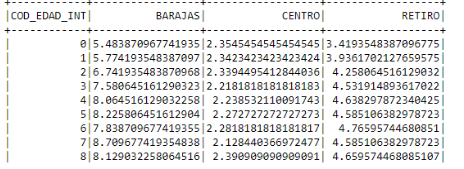

In [22]:
df4 = (df
      .select("COD_EDAD_INT",
              "DESC_DISTRITO",
              "EspanolesMujeres"
             )       
       .groupBy("COD_EDAD_INT")
       .pivot("DESC_DISTRITO")
       .sum("EspanolesMujeres")
       .select("COD_EDAD_INT",
               "BARAJAS",
               "CENTRO",
               "RETIRO"
              )
       .withColumn("BARAJAS",when(col("BARAJAS").isNull(), 0)
                   .otherwise(col("BARAJAS")                             )
                  )
       .withColumn("CENTRO",when(col("CENTRO").isNull(), 0)
                   .otherwise(col("CENTRO")                             )
                  )
       .withColumn("RETIRO",when(col("RETIRO").isNull(), 0)
                   .otherwise(col("RETIRO")                             )
                  )
       .orderBy("COD_EDAD_INT")
       .cache()
      )

In [23]:
df4.toPandas()

,COD_EDAD_INT,BARAJAS,CENTRO,RETIRO
0,0,143,241,298
1,1,211,247,357
2,2,185,235,336
3,3,213,232,399
4,4,236,242,423
...,...,...,...,...
112,112,0,0,1
113,113,0,0,0
114,114,0,0,0
115,122,0,0,0


In [24]:
df4.select(sum("BARAJAS"),sum("CENTRO"),sum("RETIRO")).show()

+------------+-----------+-----------+
|sum(BARAJAS)|sum(CENTRO)|sum(RETIRO)|
+------------+-----------+-----------+
|       23298|      51997|      58653|
+------------+-----------+-----------+



In [25]:
(df.select("DESC_DISTRITO",
              "EspanolesMujeres")
 .groupBy("DESC_DISTRITO")
 .agg(sum("EspanolesMujeres"))
 .where(
     (col("DESC_DISTRITO") == "BARAJAS") |
     (col("DESC_DISTRITO") == "CENTRO") |
     (col("DESC_DISTRITO") == "RETIRO")
 )
).show()

+-------------+---------------------+
|DESC_DISTRITO|sum(EspanolesMujeres)|
+-------------+---------------------+
|       RETIRO|                58653|
|      BARAJAS|                23298|
|       CENTRO|                51997|
+-------------+---------------------+



#### • 6.15) Utilizando este nuevo DF, crea 3 columnas nuevas que hagan referencia a qué porcentaje de la suma de "espanolesmujeres" en los tres distritos para cada rango de edad representa cada uno de los tres distritos. Debe estar redondeada a 2 decimales. Puedes imponerte la condición extra de no apoyarte en ninguna columna auxiliar creada para el caso. 

In [26]:
df5 = (df4
       .withColumn("% BARAJAS",
                   col("BARAJAS") / (col("BARAJAS") + col("CENTRO") + col("RETIRO")) 
                  )
       .withColumn("% CENTRO",
                   col("CENTRO") / (col("BARAJAS") + col("CENTRO") + col("RETIRO")) 
                  )
       .withColumn("% RETIRO",
                   col("RETIRO") / (col("BARAJAS") + col("CENTRO") + col("RETIRO")) 
                  )
       .withColumn("% BARAJAS",when(col("% BARAJAS").isNull(), 0)
                   .otherwise(col("% BARAJAS")                             )
                  )
       .withColumn("% CENTRO",when(col("% CENTRO").isNull(), 0)
                   .otherwise(col("% CENTRO")                             )
                  )
       .withColumn("% RETIRO",when(col("% RETIRO").isNull(), 0)
                   .otherwise(col("% RETIRO")                             )
                  )       
      )    

In [27]:
df4.unpersist()
df5.toPandas()

,COD_EDAD_INT,BARAJAS,CENTRO,RETIRO,% BARAJAS,% CENTRO,% RETIRO
0,0,143,241,298,0.209677,0.353372,0.436950
1,1,211,247,357,0.258896,0.303067,0.438037
2,2,185,235,336,0.244709,0.310847,0.444444
3,3,213,232,399,0.252370,0.274882,0.472749
4,4,236,242,423,0.261931,0.268590,0.469478
...,...,...,...,...,...,...,...
112,112,0,0,1,0.000000,0.000000,1.000000
113,113,0,0,0,0.000000,0.000000,0.000000
114,114,0,0,0,0.000000,0.000000,0.000000
115,122,0,0,0,0.000000,0.000000,0.000000


In [28]:
(df5
 .where(col("COD_EDAD_INT") > 100)
 .toPandas()
)

,COD_EDAD_INT,BARAJAS,CENTRO,RETIRO,% BARAJAS,% CENTRO,% RETIRO
0,101,3,12,19,0.088235,0.352941,0.558824
1,102,2,5,15,0.090909,0.227273,0.681818
2,103,1,5,7,0.076923,0.384615,0.538462
3,104,0,5,3,0.000000,0.625000,0.375000
4,105,0,1,4,0.000000,0.200000,0.800000
5,106,0,3,2,0.000000,0.600000,0.400000
6,107,0,2,0,0.000000,1.000000,0.000000
7,108,0,1,0,0.000000,1.000000,0.000000
8,109,1,0,1,0.500000,0.000000,0.500000
9,110,0,1,2,0.000000,0.333333,0.666667


#### •  6.16) Guarda el archivo csv original particionado por distrito y por barrio (en ese orden) en un directorio local. Consulta el directorio para ver la estructura de los ficheros y comprueba que es la esperada.

In [29]:
(df.write 
  .partitionBy("DESC_DISTRITO","DESC_BARRIO") # this is optional
  .mode('overwrite') # or append  
  .format('csv') # this is optional, parquet is default
  .option('path', "Resultados/df_csv")
  .save())

#### • 6.17) Haz el mismo guardado pero en formato parquet. Compara el peso del archivo con el resultado anterior.

In [30]:
(df.write
  .partitionBy("DESC_DISTRITO","DESC_BARRIO") # this is optional
  .mode('overwrite') # or append  
  .format('parquet') # this is optional, parquet is default
  .option('path', "Resultados/df_parquet")
  .save())

In [31]:
df.unpersist()

DataFrame[COD_DISTRITO: int, DESC_DISTRITO: string, COD_DIST_BARRIO: int, DESC_BARRIO: string, COD_BARRIO: int, COD_DIST_SECCION: int, COD_SECCION: int, COD_EDAD_INT: int, EspanolesHombres: int, EspanolesMujeres: int, ExtranjerosHombres: int, ExtranjerosMujeres: int]

## 7- ¿Y si juntamos Spark y Hive?

#### • 7.1) Por último, prueba a hacer los ejercicios sugeridos en la parte de Hive con el csv "Datos Padrón" (incluyendo la importación con Regex) utilizando desde Spark EXCLUSIVAMENTE sentencias spark.sql, es decir, importar los archivos desde local directamente como tablas de Hive y haciendo todas las consultas sobre estas tablas sin transformarlas en ningún momento en DataFrames ni DataSets.

In [32]:
from pyspark.sql import *
from pyspark.sql.types import *

In [37]:
from pyspark.sql import SparkSession

spark.stop()
spark = (SparkSession
    .builder
    .appName("Un poquito de Spark")
    .config("spark.sql.catalogImplementation","hive")
    .getOrCreate())

Eliminar (si existen directorios metastore_db y spark-warehouse )

In [38]:
df = (spark.read.csv("Rango_Edades_Seccion_202110.csv",
                    inferSchema = True,
                    header = True, 
                    sep = ';'
                    )      
     )
df.write.mode("overwrite").saveAsTable("Padron_txt")

In [39]:
spark.sql("""select * from Padron_txt""").show(2)

+------------+--------------------+---------------+--------------------+----------+----------------+-----------+------------+----------------+----------------+------------------+------------------+
|COD_DISTRITO|       DESC_DISTRITO|COD_DIST_BARRIO|         DESC_BARRIO|COD_BARRIO|COD_DIST_SECCION|COD_SECCION|COD_EDAD_INT|EspanolesHombres|EspanolesMujeres|ExtranjerosHombres|ExtranjerosMujeres|
+------------+--------------------+---------------+--------------------+----------+----------------+-----------+------------+----------------+----------------+------------------+------------------+
|           1|CENTRO              |            101|PALACIO             |         1|            1006|          6|          97|               1|               1|              null|              null|
|           1|CENTRO              |            101|PALACIO             |         1|            1006|          6|          98|            null|               1|              null|              null|
+---------

In [40]:
spark.sql("""CREATE TABLE padron_txt_2
STORED AS TextFile
AS
SELECT COD_DISTRITO,
       TRIM(DESC_DISTRITO) as DESC_DISTRITO,
       COD_DIST_BARRIO,
       TRIM(DESC_BARRIO) as DESC_BARRIO,
       COD_BARRIO,
       COD_DIST_SECCION,
       COD_SECCION,
       COD_EDAD_INT,
       EspanolesHombres,
       EspanolesMujeres,
       ExtranjerosHombres,
       ExtranjerosMujeres 
FROM Padron_txt""")

DataFrame[]

In [41]:
spark.sql("""CREATE TABLE padron_txt_3
STORED AS TextFile
AS
SELECT COD_DISTRITO,
       DESC_DISTRITO,
       COD_DIST_BARRIO,
       DESC_BARRIO,
       COD_BARRIO,
       COD_DIST_SECCION,
       COD_SECCION,
       COD_EDAD_INT,
       case when length(EspanolesHombres) = 0 then "0" else EspanolesHombres end as EspanolesHombres,
       case when length(EspanolesMujeres) = 0 then "0" else EspanolesMujeres end as EspanolesMujeres,
       case when length(ExtranjerosHombres) = 0 then "0" else ExtranjerosHombres end as ExtranjerosHombres,
       case when length(ExtranjerosMujeres) = 0 then "0" else ExtranjerosMujeres end as ExtranjerosMujeres
FROM Padron_txt""")

DataFrame[]

In [42]:
spark.sql("""CREATE TABLE padron_txt_4
STORED AS TextFile
AS
SELECT COD_DISTRITO,
       DESC_DISTRITO,
       COD_DIST_BARRIO,
       DESC_BARRIO,
       COD_BARRIO,
       COD_DIST_SECCION,
       COD_SECCION,
       COD_EDAD_INT,
       case when length(EspanolesHombres) = 0 then "0" else EspanolesHombres end as EspanolesHombres,
       case when length(EspanolesMujeres) = 0 then "0" else EspanolesMujeres end as EspanolesMujeres,
       case when length(ExtranjerosHombres) = 0 then "0" else ExtranjerosHombres end as ExtranjerosHombres,
       case when length(ExtranjerosMujeres) = 0 then "0" else ExtranjerosMujeres end as ExtranjerosMujeres
FROM padron_txt_2""")

DataFrame[]

In [43]:
spark.sql("""CREATE TABLE padron_parquet 
STORED AS parquet
AS
SELECT COD_DISTRITO,
       DESC_DISTRITO,
       COD_DIST_BARRIO,
       DESC_BARRIO,
       COD_BARRIO,
       COD_DIST_SECCION,
       COD_SECCION,
       COD_EDAD_INT,
      EspanolesHombres,
      EspanolesMujeres,
      ExtranjerosHombres,
      ExtranjerosMujeres
FROM padron_txt_3""")

DataFrame[]

In [44]:
spark.sql("""CREATE TABLE padron_parquet_2
STORED AS parquet
AS
SELECT COD_DISTRITO,
       DESC_DISTRITO,
       COD_DIST_BARRIO,
       DESC_BARRIO,
       COD_BARRIO,
       COD_DIST_SECCION,
       COD_SECCION,
       COD_EDAD_INT,
       EspanolesHombres,
      EspanolesMujeres,
      ExtranjerosHombres,
      ExtranjerosMujeres
FROM padron_txt_4""")

DataFrame[]

In [45]:
spark.sql("""select DESC_DISTRITO,
       DESC_BARRIO,
       sum(cast(EspanolesHombres as int)) as EspanolesHombres, 
       sum(cast(espanolesMujeres as int)) as espanolesMujeres,
       sum(cast(ExtranjerosHombres as int)) as ExtranjerosHombres,
       sum(cast(ExtranjerosMujeres as int)) as ExtranjerosMujeres
from padron_parquet_2
group by DESC_DISTRITO,DESC_BARRIO;""").toPandas()

,DESC_DISTRITO,DESC_BARRIO,EspanolesHombres,espanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres
0,FUENCARRAL-EL PARDO,MIRASIERRA,16169.0,17257,704.0,1069.0
1,SALAMANCA,CASTELLANA,6137.0,7727,1386.0,1906.0
2,SAN BLAS-CANILLEJAS,EL SALVADOR,4866.0,5442,456.0,557.0
3,HORTALEZA,VALDEFUENTES,28684.0,29144,2977.0,3803.0
4,MONCLOA-ARAVACA,CASA DE CAMPO,5415.0,6362,558.0,595.0
...,...,...,...,...,...,...
127,CIUDAD LINEAL,SAN PASCUAL,7247.0,8749,683.0,889.0
128,CIUDAD LINEAL,VENTAS,17635.0,21725,3992.0,4798.0
129,USERA,ORCASUR,5660.0,5984,1255.0,1332.0
130,VILLAVERDE,BUTARQUE,8705.0,9144,1451.0,1604.0


In [46]:
spark.sql("""select DESC_DISTRITO,
       DESC_BARRIO,
       sum(cast(EspanolesHombres as int)) as EspanolesHombres, 
       sum(cast(espanolesMujeres as int)) as espanolesMujeres,
       sum(cast(ExtranjerosHombres as int)) as ExtranjerosHombres,
       sum(cast(ExtranjerosMujeres as int)) as ExtranjerosMujeres
from padron_txt_4
group by DESC_DISTRITO,DESC_BARRIO;""").toPandas()

,DESC_DISTRITO,DESC_BARRIO,EspanolesHombres,espanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres
0,FUENCARRAL-EL PARDO,MIRASIERRA,16169.0,17257,704.0,1069.0
1,SALAMANCA,CASTELLANA,6137.0,7727,1386.0,1906.0
2,SAN BLAS-CANILLEJAS,EL SALVADOR,4866.0,5442,456.0,557.0
3,HORTALEZA,VALDEFUENTES,28684.0,29144,2977.0,3803.0
4,MONCLOA-ARAVACA,CASA DE CAMPO,5415.0,6362,558.0,595.0
...,...,...,...,...,...,...
127,CIUDAD LINEAL,SAN PASCUAL,7247.0,8749,683.0,889.0
128,CIUDAD LINEAL,VENTAS,17635.0,21725,3992.0,4798.0
129,USERA,ORCASUR,5660.0,5984,1255.0,1332.0
130,VILLAVERDE,BUTARQUE,8705.0,9144,1451.0,1604.0
